# Project - Santander Customer Satisfaction
Developer: Andre Kim Scarton

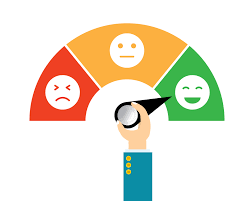

## Description
Customer satisfaction is a key measure of success. Customers dissatisfied cancel their services and rarely express their dissatisfaction before to leave.
Happy customers, on the other hand, become brand advocates !

Banco Santander is asking to help them identify customers dissatisfied at the beginning of the relationship. This would allow Santander take proactive steps to improve a customers's happiness before they be too late.

## Objective 
The task is to predict the probability that each customer in the test set is an unsatisfied customer (predict a class 0 or 1)

In [ ]:
# Imports 
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score 
%matplotlib inline 
import warnings
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import imblearn
from imblearn.over_sampling import SMOTE
import joblib

## Loading the dataset (Train)

In [ ]:
# Load the data 
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/train.csv/train.csv')

In [ ]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
# Shape
data.shape

(76020, 371)

In [ ]:
# Columns
data.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [ ]:
# Data sample
data.sample(10)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
42742,85611,2,27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181942.230000,0
3226,6484,2,38,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59530.770000,1
51612,103066,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124664.580000,0
41013,82093,2,24,0.0,115.77,115.77,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47394.300000,0
56545,112814,2,27,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54239.460000,0
29891,59770,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84924.540000,0
40834,81709,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108857.700000,0
64282,128452,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
1145,2268,2,58,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42621.390000,0
58419,116586,2,30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45095.100000,0


## Exploratory Data Analysis (Part 1)

*   I will test how the model behaves with all the variables and without much manipulation of the data. Then I will carry out the appropriate manipulations to improve the score of the acquired model




In [ ]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
# Categorical variables 
data.dtypes[data.dtypes == 'object']

Series([], dtype: object)

In [ ]:
# Non-categorical variables 
data.dtypes[data.dtypes != 'object']

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

## Exploration of Numerical Variables 

In [ ]:
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


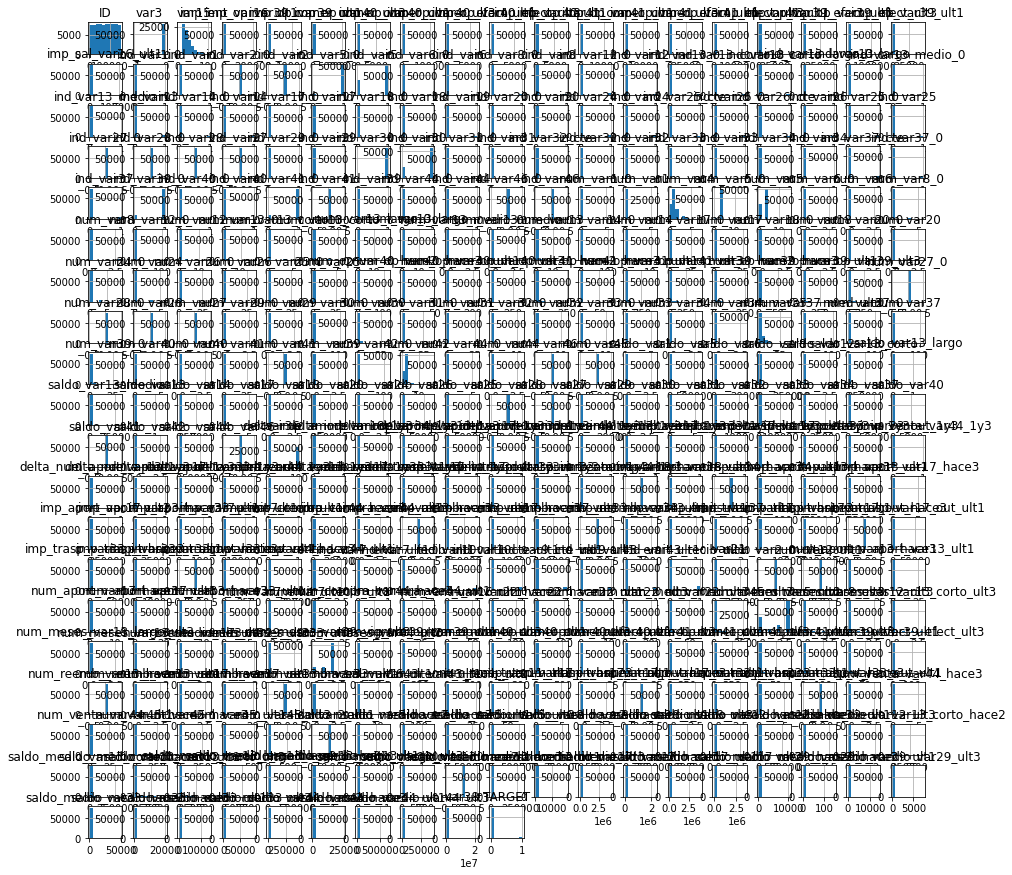

In [ ]:
# Plot 
data.hist(figsize = (15,15), bins = 10)
plt.show()

## Checking the relationship between attributes

In [ ]:
data.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.003674,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,-0.000856,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000297,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,-0.005687,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


## Checking for missing values and duplicates records 

In [ ]:
# Checking missing values 
data[data.isnull().values]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET


In [ ]:
# Checking for duplicates records (complete cases)
# complete cases also refer to lines where there are no missing values
data[data.duplicated(keep=False)]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET


In [ ]:
# Checking if there is no missing hidden
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  ID  is :  0
Count of zeros in column  var3  is :  75
Count of zeros in column  var15  is :  0
Count of zeros in column  imp_ent_var16_ult1  is :  72301
Count of zeros in column  imp_op_var39_comer_ult1  is :  66075
Count of zeros in column  imp_op_var39_comer_ult3  is :  64330
Count of zeros in column  imp_op_var40_comer_ult1  is :  75725
Count of zeros in column  imp_op_var40_comer_ult3  is :  75672
Count of zeros in column  imp_op_var40_efect_ult1  is :  75982
Count of zeros in column  imp_op_var40_efect_ult3  is :  75975
Count of zeros in column  imp_op_var40_ult1  is :  75791
Count of zeros in column  imp_op_var41_comer_ult1  is :  66226
Count of zeros in column  imp_op_var41_comer_ult3  is :  64480
Count of zeros in column  imp_op_var41_efect_ult1  is :  69336
Count of zeros in column  imp_op_var41_efect_ult3  is :  67372
Count of zeros in column  imp_op_var41_ult1  is :  64388
Count of zeros in column  imp_op_var39_efect_ult1  is :  69325
Count of zeros 

As we can see, there are a lot of variables that contain a large amount of 'Null' numbers (number 0) that can greatly disrupt the model if they are not removed 

Note: I will remove all variable that contain these large amounts of 0 values

Removing the target which is the variable we want to predict 

In [ ]:
# Creating a dataframe to filter columns that have a large number of 'Null' values (0 values)
x = []
y = []
for column_name in data.columns:
  name = column_name
  x.append(name)
  column = data[column_name]
  count = (column == 0).sum()
  y.append(count)
  list_of_tuples = list(zip(x,y))
  df_missing_values = pd.DataFrame(list_of_tuples,columns=['column_name','missing_value'])


In [ ]:
# I will select the variables that contain 80% of the filled values 
df_filter1_variables = df_missing_values.loc[df_missing_values['missing_value'] <= 15204]

In [ ]:
df_filter1_variables

,column_name,missing_value
0,ID,0
1,var3,75
2,var15,0
24,ind_var5_0,3191
63,ind_var30_0,343
77,ind_var39_0,9065
80,ind_var41_0,9177
90,num_var5_0,3191
138,num_var30_0,343
152,num_var39_0,9065


Note:These will be the first variabels for the first training, let's see how they behave and how accurate we can get with them.
If we see taht the accuracy is not enough, we will go up the filter and increase the number of variabels and carry out other types of variable selection 

## Exploratory Data Analysis (Part 2)


*   Let's perform the second exploratory analysis with the selected variables 



In [ ]:
# Selectiong columns with after study done above (I will remove the ID because it is a variable that will not contribute to the study )
df_columns_filter = data[['var3','var15','ind_var5_0','ind_var30_0','ind_var39_0','ind_var41_0','num_var5_0','num_var30_0','num_var39_0','num_var41_0','num_var42_0','var36','num_meses_var39_vig_ult3','var38','TARGET']]
df_columns_filter.shape

(76020, 15)

In [ ]:
# Checking missing values 
df_columns_filter[df_columns_filter.isnull().values]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET


In [ ]:
# Checking for duplicates records (complete cases)
# complete cases also refer to lines where there are no missing values
df_columns_filter[df_columns_filter.duplicated(keep=False)]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
4,2,39,1,1,1,1,3,6,3,3,6,1,2,117310.979016,0
16,2,44,1,1,0,0,3,3,0,0,3,99,0,117310.979016,0
22,2,35,1,1,1,1,3,6,3,3,6,2,2,117310.979016,0
24,2,42,1,1,1,1,3,3,3,3,3,99,2,117310.979016,0
34,2,42,1,1,0,0,3,3,0,0,3,99,0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75984,2,36,0,1,1,1,0,3,3,3,3,2,2,117310.979016,0
75991,2,26,1,1,1,1,3,3,3,3,3,2,1,117310.979016,0
75996,2,30,1,1,1,1,3,3,3,3,3,3,2,117310.979016,0
76006,2,45,1,1,1,1,3,6,3,3,6,1,2,117310.979016,0


In [ ]:
# Removing duplicates values 
df_columns_filter_drop = df_columns_filter.drop_duplicates(keep='first')

In [ ]:
df_columns_filter_drop[df_columns_filter_drop.duplicated(keep=False)]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET


### Exploration of Numerical Variables

In [ ]:
df_columns_filter_drop.describe()

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
count,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,63297.000000,6.329700e+04,63297.000000
mean,-1466.405090,33.625590,0.952257,0.994581,0.882301,0.880531,2.879757,3.394521,2.744443,2.714204,3.215745,39.916615,1.592966,1.170989e+05,0.041819
std,38303.184692,13.310123,0.213224,0.073414,0.322254,0.324342,0.699715,1.391998,1.161545,1.123011,0.991988,47.262518,0.719896,1.996181e+05,0.200176
min,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,6.261228e+04,0.000000
50%,2.000000,28.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,9.131475e+04,0.000000
75%,2.000000,40.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,99.000000,2.000000,1.302145e+05,0.000000
max,238.000000,105.000000,1.000000,1.000000,1.000000,1.000000,15.000000,114.000000,33.000000,33.000000,114.000000,99.000000,3.000000,2.203474e+07,1.000000


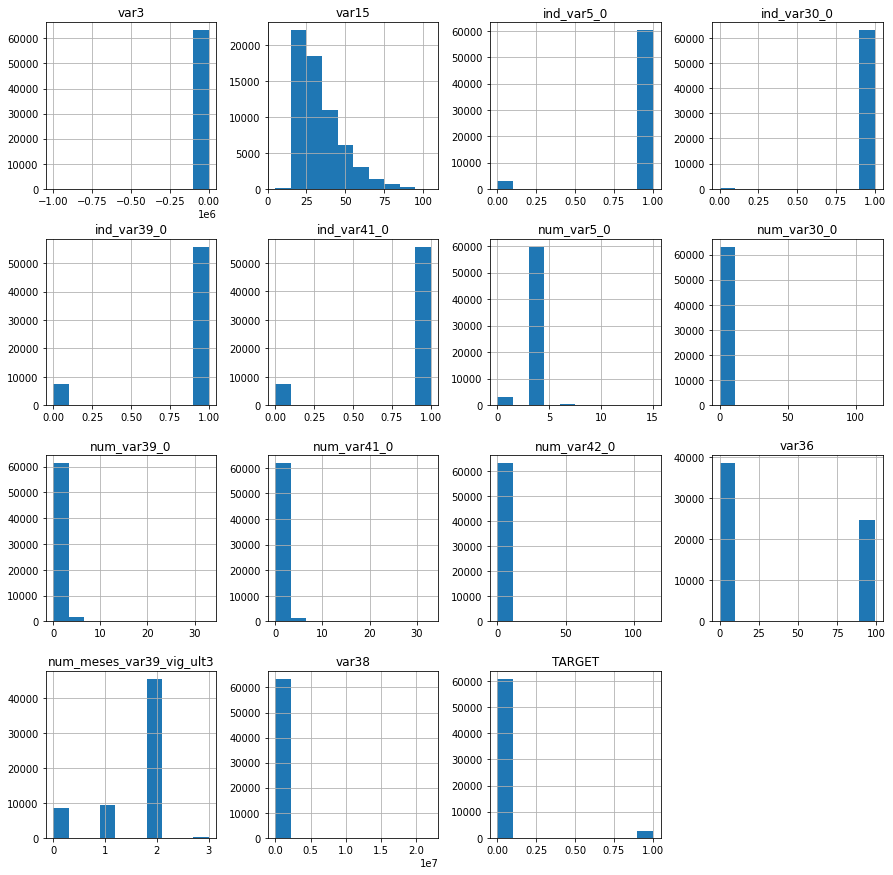

In [ ]:
# Plot 
df_columns_filter_drop.hist(figsize = (15,15), bins = 10)
plt.show()

Note: We can see that the TARGET variable is unbalanced and var3 and var38 possibly has an outlier taht can complicate the study, so we will carry out the study of outliers in the variables 

## Outliers Treatment 

<Axes: >

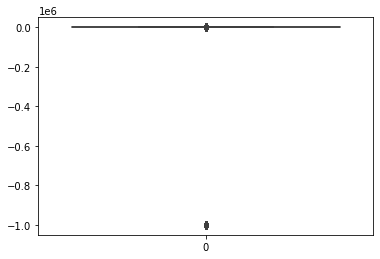

In [ ]:
# Carrying out a study with a boxplot 
sns.boxplot(df_columns_filter_drop.var3)

Are the extreme values really outliers (variable var3)?

In [ ]:
df_columns_filter_drop.var3.sort_values(ascending = True).head(100)

46395   -999999
782     -999999
13874   -999999
28912   -999999
30939   -999999
          ...  
6568          0
2113          0
43865         0
68480         0
3702          0
Name: var3, Length: 100, dtype: int64

In [ ]:
df_columns_filter_drop.loc[df_columns_filter['var3'] == -999999,:]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
782,-999999,33,1,1,0,0,3,3,0,0,3,99,0,117310.979016,0
3361,-999999,36,1,1,0,0,3,3,0,0,3,1,0,117310.979016,0
4103,-999999,27,1,1,1,1,3,3,3,3,3,1,2,117310.979016,0
4422,-999999,45,1,1,1,1,3,3,3,3,3,99,2,117310.979016,0
7053,-999999,44,1,1,1,1,3,3,3,3,3,99,2,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74796,-999999,25,1,1,1,1,3,3,3,3,3,99,1,117310.979016,0
74846,-999999,25,1,1,0,0,3,3,0,0,3,3,0,117310.979016,0
75012,-999999,39,1,1,1,1,3,3,6,3,3,2,1,117310.979016,0
75783,-999999,38,1,1,0,0,3,3,0,0,3,3,0,117310.979016,0


Note: Observing the data with quantities with values -999999 possibly outliers (possible typing error, missing values, etc...)

<Axes: >

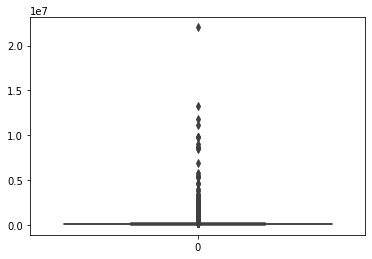

In [ ]:
sns.boxplot(df_columns_filter_drop.var38)

Are the extreme values really outliers (var38)

In [ ]:
df_columns_filter_drop.var38.sort_values(ascending = False).head(100)

24821    22034738.76
31738    13268621.28
25079    11857856.46
31747    11139895.56
33494     9833872.77
            ...     
75565     1068497.52
5471      1067972.01
75766     1067277.06
67343     1065263.61
56348     1063936.86
Name: var38, Length: 100, dtype: float64

<Axes: >

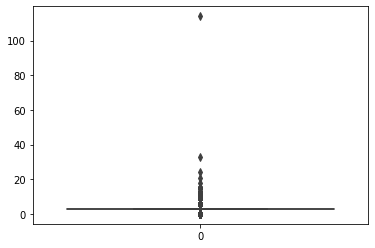

In [ ]:
sns.boxplot(df_columns_filter_drop.num_var30_0)

In [ ]:
# Are the extreme values really outliers (num_var30_0) ?
df_columns_filter_drop.num_var30_0.sort_values(ascending =False)

73517    114
34838     33
48596     24
75373     21
18276     18
        ... 
13932      0
13930      0
68575      0
15284      0
65617      0
Name: num_var30_0, Length: 63297, dtype: int64

### z-score

Note: To remove the outliers we will use the z-score method.
Ussually z-score = 3 is considered as a cut-off value to set the limit.
Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similiar to standard deviation method 

In [ ]:
# Performing the z-score transformation
df_z_score = df_columns_filter_drop.apply(stats.zscore)
df_z_score.head()

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
0,0.038337,-0.798315,0.223913,0.073813,0.36524,0.368345,0.171846,-0.283423,0.220017,0.254492,-0.217489,1.250121,0.56541,-0.390217,-0.208911
1,0.038337,0.028130,0.223913,0.073813,0.36524,0.368345,0.171846,1.871770,0.220017,0.254492,-0.217489,-0.781103,0.56541,-0.339756,-0.208911
2,0.038337,-0.798315,0.223913,0.073813,0.36524,0.368345,0.171846,-0.283423,0.220017,0.254492,-0.217489,1.250121,-0.82369,-0.249304,-0.208911
3,0.038337,0.253524,0.223913,0.073813,0.36524,0.368345,0.171846,-0.283423,0.220017,0.254492,-0.217489,-0.802262,-0.82369,-0.265965,-0.208911
4,0.038337,0.403787,0.223913,0.073813,0.36524,0.368345,0.171846,1.871770,0.220017,0.254492,2.806765,-0.823420,0.56541,0.001063,-0.208911


In [ ]:
# Creating a dataframe tiwh columns and rows that had z-score above 3
z_score_above_3 = df_z_score[df_z_score.iloc[:,0:14]>3]

In [ ]:
index_z_score_above_3 = z_score_above_3.dropna(how='all')
index_z_score_above_3

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.026962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,3.183648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.026962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,3.258779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,3.183648,NaN,NaN,NaN,NaN,NaN,6.182155,NaN,NaN,5.83102,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75962,NaN,NaN,NaN,NaN,NaN,NaN,4.459337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75982,NaN,3.183648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76000,NaN,3.108516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.026962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 index_above_3 = index_z_score_above_3.index.values

In [ ]:
df_index_above_3= df_columns_filter_drop.loc[index_above_3]
df_index_above_3

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
50,2,42,1,1,1,1,3,9,3,3,6,1,2,245388.780000,0
53,178,76,0,1,0,0,0,3,0,0,0,3,0,56913.060000,0
83,2,36,1,1,1,1,3,9,3,3,6,3,2,255365.250000,0
104,2,77,1,1,1,1,3,6,3,3,3,3,2,49965.870000,0
113,2,76,1,1,1,1,3,12,3,3,9,2,2,53029.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75962,2,29,1,1,1,1,6,6,6,6,6,2,2,117310.979016,0
75982,2,76,1,1,1,1,3,6,3,3,3,3,2,117310.979016,0
76000,2,75,1,1,1,1,3,3,3,3,3,1,1,117310.979016,1
76002,2,37,1,1,1,1,3,9,3,3,6,1,2,394687.350000,0


In [ ]:
# Creating a dataframe with columns and rows that had z_score below -3
z_score_below_3 = df_z_score[df_z_score.iloc[:,0:14]<-3]

In [ ]:
index_z_score_below = z_score_below_3.dropna(how='all')
index_z_score_below

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
10,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,-3.241744,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,-26.069385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75980,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75988,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76007,NaN,NaN,-4.466027,NaN,NaN,NaN,-4.115644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 index_below_3 = index_z_score_below.index.values

In [ ]:
df_index_below_3 = df_columns_filter_drop.loc[index_below_3]
df_index_below_3

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
10,2,42,0,1,1,1,0,3,3,3,3,1,2,125424.06,0
14,2,33,0,1,1,1,0,3,3,3,3,1,2,95294.13,0
25,2,40,0,1,1,1,0,3,6,3,3,1,2,78390.81,0
30,2,14,0,1,0,0,0,3,0,0,3,99,0,101789.79,0
53,178,76,0,1,0,0,0,3,0,0,0,3,0,56913.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,-999999,38,1,1,0,0,3,3,0,0,3,99,0,93036.48,0
75980,2,32,0,1,1,1,0,6,3,3,6,1,2,70618.83,0
75988,2,41,0,1,1,1,0,3,3,3,3,2,2,116466.75,0
76007,2,61,0,1,1,1,0,3,3,3,3,99,2,83667.15,1


### Removing outlier records

In [ ]:
# Checking duplicates
df_columns_filter_drop[df_columns_filter_drop.duplicated(keep=False)]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET


In [ ]:
df_columns_filter_drop.shape

(63297, 15)

In [ ]:
df_index_above_3.shape

(3472, 15)

In [ ]:
df_index_below_3.shape

(3115, 15)

In [ ]:
# Concatenating dataframe (df_columns_filter_drop) with df_index_above_3 and df_index_below_3
df_drop_above_3 = pd.concat([df_columns_filter_drop,df_index_above_3,df_index_below_3])
df_drop_above_3.head()

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
0,2,23,1,1,1,1,3,3,3,3,3,99,2,39205.170000,0
1,2,34,1,1,1,1,3,6,3,3,3,3,2,49278.030000,0
2,2,23,1,1,1,1,3,3,3,3,3,99,1,67333.770000,0
3,2,37,1,1,1,1,3,3,3,3,3,2,1,64007.970000,0
4,2,39,1,1,1,1,3,6,3,3,6,1,2,117310.979016,0


In [ ]:
df_drop_above_3.shape

(69884, 15)

In [ ]:
# Checking duplicates
df_drop_above_3[df_drop_above_3.duplicated(keep=False)]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
10,2,42,0,1,1,1,0,3,3,3,3,1,2,125424.06,0
14,2,33,0,1,1,1,0,3,3,3,3,1,2,95294.13,0
25,2,40,0,1,1,1,0,3,6,3,3,1,2,78390.81,0
30,2,14,0,1,0,0,0,3,0,0,3,99,0,101789.79,0
50,2,42,1,1,1,1,3,9,3,3,6,1,2,245388.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,-999999,38,1,1,0,0,3,3,0,0,3,99,0,93036.48,0
75980,2,32,0,1,1,1,0,6,3,3,6,1,2,70618.83,0
75988,2,41,0,1,1,1,0,3,3,3,3,2,2,116466.75,0
76007,2,61,0,1,1,1,0,3,3,3,3,99,2,83667.15,1


In [ ]:
drop_all_above_3 = df_drop_above_3.drop_duplicates(keep=False)

In [ ]:
# Checking duplicates
drop_all_above_3[drop_all_above_3.duplicated(keep=False)]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET


In [ ]:
drop_all_above_3.shape

(56897, 15)

In [ ]:
data_clean = drop_all_above_3.copy()
data_clean.head()

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
0,2,23,1,1,1,1,3,3,3,3,3,99,2,39205.170000,0
1,2,34,1,1,1,1,3,6,3,3,3,3,2,49278.030000,0
2,2,23,1,1,1,1,3,3,3,3,3,99,1,67333.770000,0
3,2,37,1,1,1,1,3,3,3,3,3,2,1,64007.970000,0
4,2,39,1,1,1,1,3,6,3,3,6,1,2,117310.979016,0


In [ ]:
data_clean.loc[data_clean['var3']==-999999,:]

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET


<Axes: >

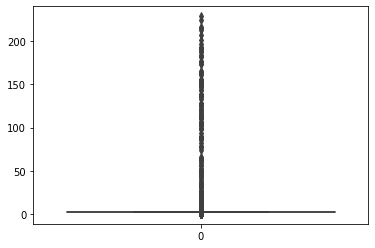

In [ ]:
sns.boxplot(data_clean.var3)

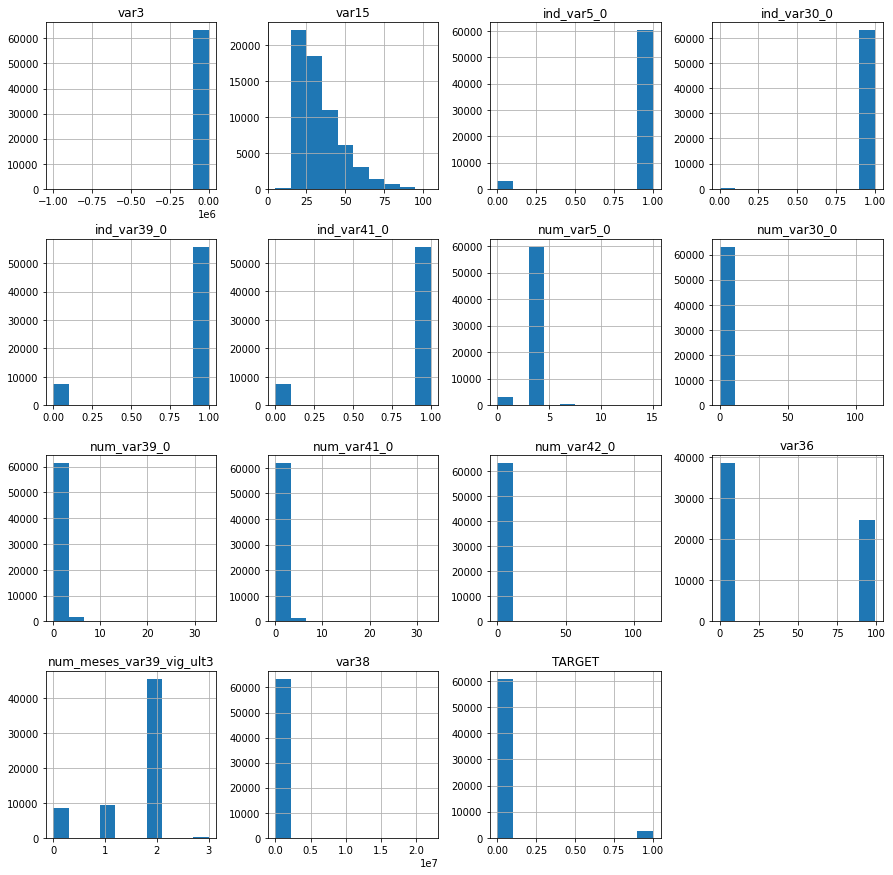

In [ ]:
# Plot 
df_columns_filter_drop.hist(figsize = (15,15), bins = 10)
plt.show()

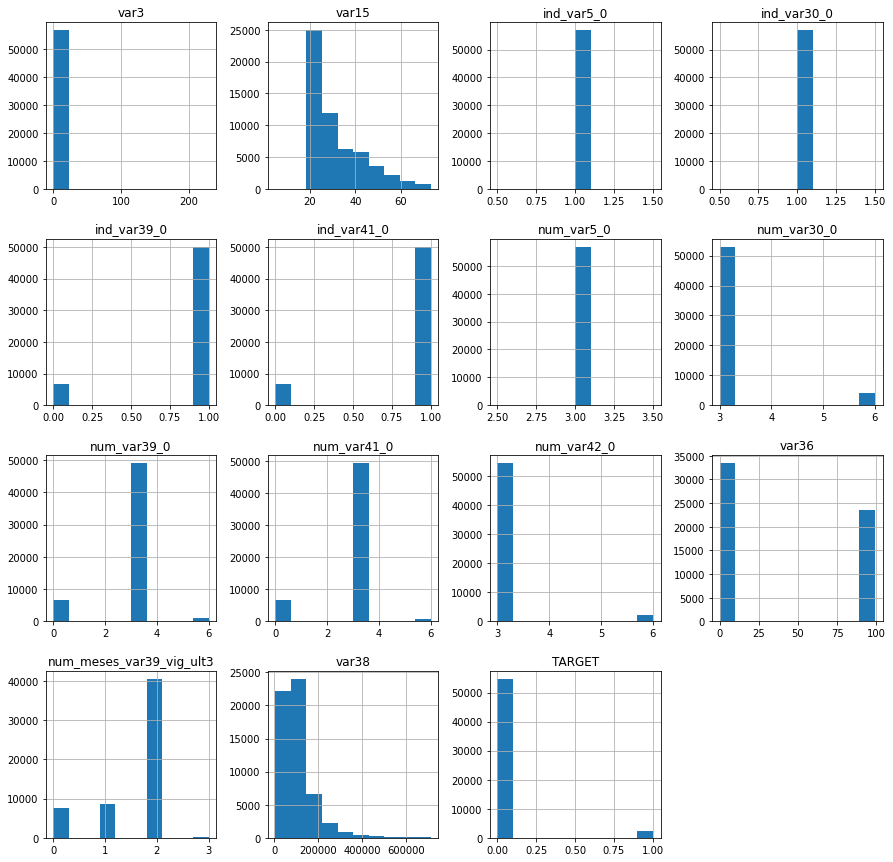

In [ ]:
# Plot 
data_clean.hist(figsize = (15,15), bins = 10)
plt.show()

In [ ]:
data_clean.describe()

,var3,var15,ind_var5_0,ind_var30_0,ind_var39_0,ind_var41_0,num_var5_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
count,56897.000000,56897.000000,56897.0,56897.0,56897.000000,56897.000000,56897.0,56897.000000,56897.000000,56897.000000,56897.000000,56897.000000,56897.000000,56897.000000,56897.000000
mean,2.312038,32.083221,1.0,1.0,0.880855,0.880837,3.0,3.205793,2.699088,2.685959,3.122906,42.053588,1.582122,109467.982877,0.041127
std,5.627326,11.335670,0.0,0.0,0.323962,0.323983,0.0,0.758313,1.073009,1.050810,0.594659,47.660309,0.721776,77191.805114,0.198586
min,0.000000,5.000000,1.0,1.0,0.000000,0.000000,3.0,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,5163.750000,0.000000
25%,2.000000,23.000000,1.0,1.0,1.000000,1.000000,3.0,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,61696.860000,0.000000
50%,2.000000,27.000000,1.0,1.0,1.000000,1.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,89318.970000,0.000000
75%,2.000000,38.000000,1.0,1.0,1.000000,1.000000,3.0,3.000000,3.000000,3.000000,3.000000,99.000000,2.000000,128822.850000,0.000000
max,229.000000,73.000000,1.0,1.0,1.000000,1.000000,3.0,6.000000,6.000000,6.000000,6.000000,99.000000,3.000000,713863.050000,1.000000


Note: We can notice that after cleaning the outliers, some variables are better distributed and this can help a lot with the performance of the models

And we noticed that some variables after treatment were left with unique records and this could interfere with the studies, so we will remove these variables (ind_var5_0,ind_var3_0,num_var5_0)



In [ ]:
data_clean.columns

Index(['var3', 'var15', 'ind_var5_0', 'ind_var30_0', 'ind_var39_0',
       'ind_var41_0', 'num_var5_0', 'num_var30_0', 'num_var39_0',
       'num_var41_0', 'num_var42_0', 'var36', 'num_meses_var39_vig_ult3',
       'var38', 'TARGET'],
      dtype='object')

In [ ]:
data_clean = data_clean[['var3', 'var15', 'ind_var39_0',
       'ind_var41_0', 'num_var30_0', 'num_var39_0',
       'num_var41_0', 'num_var42_0', 'var36', 'num_meses_var39_vig_ult3',
       'var38', 'TARGET']]

## Checking the relationship between attributes

In [ ]:
data_clean.corr()

,var3,var15,ind_var39_0,ind_var41_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
var3,1.000000,0.080472,0.017328,0.017330,0.016917,0.055999,0.054460,0.015420,-0.031412,0.032918,0.016479,-0.006199
var15,0.080472,1.000000,0.034728,0.034650,0.348541,0.072420,0.056428,0.251685,-0.138822,0.051845,-0.000954,0.129220
ind_var39_0,0.017328,0.034728,1.000000,0.999916,0.093156,0.925132,0.940080,0.072183,-0.150933,0.805119,-0.005208,-0.045952
ind_var41_0,0.017330,0.034650,0.999916,1.000000,0.093165,0.925057,0.940159,0.072189,-0.150876,0.805112,-0.005180,-0.045938
num_var30_0,0.016917,0.348541,0.093156,0.093165,1.000000,0.126847,0.097979,0.761595,-0.219101,0.077548,0.038963,-0.038347
num_var39_0,0.055999,0.072420,0.925132,0.925057,0.126847,1.000000,0.964170,0.102834,-0.174723,0.762125,-0.004290,-0.044365
num_var41_0,0.054460,0.056428,0.940080,0.940159,0.097979,0.964170,1.000000,0.077718,-0.167647,0.776344,-0.007584,-0.043220
num_var42_0,0.015420,0.251685,0.072183,0.072189,0.761595,0.102834,0.077718,1.000000,-0.162438,0.081212,0.028905,-0.025838
var36,-0.031412,-0.138822,-0.150933,-0.150876,-0.219101,-0.174723,-0.167647,-0.162438,1.000000,-0.118804,0.057442,0.101306
num_meses_var39_vig_ult3,0.032918,0.051845,0.805119,0.805112,0.077548,0.762125,0.776344,0.081212,-0.118804,1.000000,0.001112,-0.017801


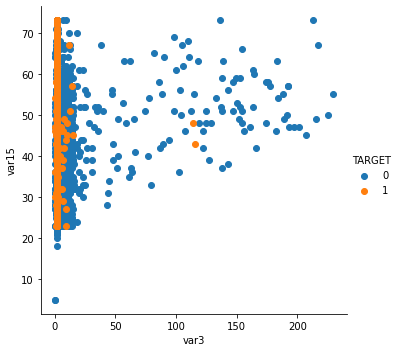

In [ ]:
# Facetgrid
sns.FacetGrid(data_clean, hue='TARGET',height=5).map(plt.scatter,'var3','var15').add_legend()

# Division into Training and Testing 

In [ ]:
data_clean.head()

,var3,var15,ind_var39_0,ind_var41_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38,TARGET
0,2,23,1,1,3,3,3,3,99,2,39205.170000,0
1,2,34,1,1,6,3,3,3,3,2,49278.030000,0
2,2,23,1,1,3,3,3,3,99,1,67333.770000,0
3,2,37,1,1,3,3,3,3,2,1,64007.970000,0
4,2,39,1,1,6,3,3,6,1,2,117310.979016,0


In [ ]:
# Create a sperate object for the target variable 
y = data_clean.TARGET

In [ ]:
# Create a separate object for the input variables
x = data_clean.drop('TARGET', axis=1)

In [ ]:
# Split training and testing data with stratified sampling 
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify = data_clean.TARGET)

In [ ]:
len(X_train)

42672

In [ ]:
len(X_test)

14225

In [ ]:
# Print Shape 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42672, 11) (14225, 11) (42672,) (14225,)


## Class Balancing

In [ ]:
y_train.value_counts()

0    40917
1     1755
Name: TARGET, dtype: int64

In [ ]:
# Let's apply the oversampling technique and increase the number of minority class examples
over_sampler = SMOTE(k_neighbors=2)

In [ ]:
# Apply oversampling (must be done with training data only)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [ ]:
len(X_res)

81834

In [ ]:
len(y_res)

81834

In [ ]:
y_res.value_counts()

1    40917
0    40917
Name: TARGET, dtype: int64

In [ ]:
# Set training dataset name to X
X_train = X_res

In [ ]:
# Set training dataset name to y
y_train = y_res

## Data Standardization

In [ ]:
X_train.head()

,var3,var15,ind_var39_0,ind_var41_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38
0,2,56,1,1,3,3,3,3,99,2,61961.19
1,2,24,1,1,3,3,3,3,99,2,418620.54
2,2,33,1,1,3,3,3,3,99,2,109067.46
3,2,43,1,1,3,3,3,3,99,2,57712.50
4,2,23,1,1,3,3,3,3,99,2,97255.50


In [ ]:
# Calculate mean and standard deviation of training data 
train_mean = X_train.mean()
train_std = X_train.std()
print(train_mean)
print(train_std)

var3                             2.204231
var15                           35.241990
ind_var39_0                      0.778295
ind_var41_0                      0.778283
num_var30_0                      3.128443
num_var39_0                      2.512929
num_var41_0                      2.504179
num_var42_0                      3.081067
var36                           54.530977
num_meses_var39_vig_ult3         1.455006
var38                       101865.462428
dtype: float64
var3                            4.344500
var15                          11.026492
ind_var39_0                     0.415396
ind_var41_0                     0.415404
num_var30_0                     0.585309
num_var39_0                     1.130369
num_var41_0                     1.115188
num_var42_0                     0.463761
var36                          46.329062
num_meses_var39_vig_ult3        0.772678
var38                       73644.147802
dtype: float64


In [ ]:
# Standardization
X_train = (X_train - train_mean)/ train_std

In [ ]:
X_train.head()

,var3,var15,ind_var39_0,ind_var41_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38
0,-0.047009,1.882558,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,0.959852,0.705331,-0.541853
1,-0.047009,-1.019544,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,0.959852,0.705331,4.301157
2,-0.047009,-0.203328,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,0.959852,0.705331,0.097795
3,-0.047009,0.703579,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,0.959852,0.705331,-0.599545
4,-0.047009,-1.110234,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,0.959852,0.705331,-0.062598


In [ ]:
# Describe 
X_train.describe()

,var3,var15,ind_var39_0,ind_var41_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38
count,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04,8.183400e+04
mean,1.180852e-17,-2.389488e-16,8.891118e-17,1.333668e-16,-1.000251e-16,-3.334169e-17,-2.222780e-17,-2.500627e-17,7.779728e-17,1.278098e-16,2.653443e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.073612e-01,-2.742666e+00,-1.873621e+00,-1.873555e+00,-2.194445e-01,-2.223105e+00,-2.245523e+00,-1.748023e-01,-1.177036e+00,-1.883070e+00,-1.313094e+00
25%,-4.700898e-02,-9.288530e-01,5.337192e-01,5.337381e-01,-2.194445e-01,4.308959e-01,4.446075e-01,-1.748023e-01,-1.112282e+00,-5.888696e-01,-6.019373e-01
50%,-4.700898e-02,-2.033276e-01,5.337192e-01,5.337381e-01,-2.194445e-01,4.308959e-01,4.446075e-01,-1.748023e-01,6.360807e-01,7.053309e-01,-2.583240e-01
75%,-4.700898e-02,6.128885e-01,5.337192e-01,5.337381e-01,-2.194445e-01,4.308959e-01,4.446075e-01,-1.748023e-01,9.598516e-01,7.053309e-01,2.097318e-01
max,5.128226e+01,3.424299e+00,5.337192e-01,5.337381e-01,4.906049e+00,3.084896e+00,3.134738e+00,6.294041e+00,9.598516e-01,1.999531e+00,8.301782e+00


In [ ]:
# We use training mean and deviation to standardize the test dataset 
X_test = (X_test - train_mean) / train_std

In [ ]:
X_test.head()

,var3,var15,ind_var39_0,ind_var41_0,num_var30_0,num_var39_0,num_var41_0,num_var42_0,var36,num_meses_var39_vig_ult3,var38
2255,-0.047009,-0.838162,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,0.959852,0.705331,1.447763
24619,-0.047009,1.157033,-1.873621,-1.873555,-0.219445,-2.223105,-2.245523,-0.174802,0.959852,-1.883070,-0.783948
39403,-0.047009,-1.110234,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,-1.112282,0.705331,-0.286439
17063,-0.047009,-1.019544,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,-1.112282,0.705331,-0.188918
36121,-0.047009,-1.019544,0.533719,0.533738,-0.219445,0.430896,0.444608,-0.174802,0.959852,0.705331,-0.419153


# Contruction, Training and Evaluation of Model 1 with Logistic Regression (Benchmark)


*   For the first version of the model, the ideal is to choose a simple, easy-to-understand algorithm that will be used as a Benchmark
*   Note: As part of the process involves randomness, the reults can be optmized for each run of this jupyter notebook.



In [ ]:
# Define hyperparameter list
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
                   'penalty': ['l1','l2']}

In [ ]:
# Create the model with GridSearch
# Multiple models will be created with different combinations of hyperparameters 
model_v1 = GridSearchCV(LogisticRegression(),
                        tuned_params_v1,
                        scoring = 'roc_auc',
                        n_jobs = -1)

In [ ]:
# model training 
model_v1.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [ ]:
# Select teh best model 
model_v1.best_estimator_

LogisticRegression(C=10000)

In [ ]:
# Predictions with test data 
y_pred_v1 = model_v1.predict(X_test)

In [ ]:
# Shows the first 10 predictions
y_pred_v1[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Get predictions in probabiity format for each class
y_pred_proba_v1 = model_v1.predict_proba(X_test)

In [ ]:
# Shows the first 10 predictions 
y_pred_proba_v1[:10]

array([[0.65337646, 0.34662354],
       [0.09788482, 0.90211518],
       [0.84002516, 0.15997484],
       [0.8318999 , 0.1681001 ],
       [0.60198137, 0.39801863],
       [0.6735423 , 0.3264577 ],
       [0.64988761, 0.35011239],
       [0.76905172, 0.23094828],
       [0.6261713 , 0.3738287 ],
       [0.8227231 , 0.1772769 ]])

In [ ]:
# Get the predictions in probability format by filtering to the positive class
# Need this to calculate the ROC Curve 
y_pred_proba_v1 = model_v1.predict_proba(X_test)[:,1]

In [ ]:
# Shows the first 10 predictions
y_pred_proba_v1[:10]

array([0.34662354, 0.90211518, 0.15997484, 0.1681001 , 0.39801863,
       0.3264577 , 0.35011239, 0.23094828, 0.3738287 , 0.1772769 ])

In [ ]:
# As an example, Let's check one of the data points
i = 30
print('For data point {}, Actual class = {}, Predicted class = {}, Predicted probabilty = {}'.
      format(i,y_test.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

For data point 30, Actual class = 0, Predicted class = 1, Predicted probabilty = 0.5267976305548481


In [ ]:
# Confusion matrix 
confusion_matrix(y_test,y_pred_v1)

array([[10559,  3081],
       [  221,   364]])

In [ ]:
# Extracting each value from the CM
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel()

In [ ]:
print(tn,fp,fn,tp)

10559 3081 221 364


In [ ]:
# Calculate global AUC (Area Under teh Curve) metric with real data and test predictions
roc_auc_v1 = roc_auc_score(y_test, y_pred_v1)
print(roc_auc_v1)

0.6981712284131639


In [ ]:
# Calculate ROC Curve with data and predictions under test
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_proba_v1)

In [ ]:
# AUC in test
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.756372847582525


In [ ]:
# Accuracy score in test
accuracy_v1 = accuracy_score(y_test, y_pred_v1)
print(accuracy_v1)

0.7678734622144112


## Feature Importance




In [ ]:
# Building the model again with the best hyperparameters
# This is necessary as the final version shouldn't have GridSearchCV
model_v1 = LogisticRegression(C=1)
model_v1.fit(X_train, y_train)

LogisticRegression(C=1)

In [ ]:
# Get the coefficients by the largest using np.argsort
indices = np.argsort(-abs(model_v1.coef_[0,:]))

In [ ]:
print('Most importante variables for model_v1 output')
print(50*'-')
for feature in x.columns[indices]:
  print(feature)

Most importante variables for model_v1 output
--------------------------------------------------
ind_var39_0
var15
num_var41_0
num_var30_0
var36
num_var39_0
ind_var41_0
var38
var3
num_var42_0
num_meses_var39_vig_ult3


In [ ]:
# Save the model to disk
with open('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v1.pkl', 'wb') as pickle_file:
      joblib.dump(model_v1, '/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v1.pkl') 

In [ ]:
# Create a Dataframe to receive measurements from each model
df_models = pd.DataFrame()

In [ ]:
# Dictionary with model_v1 metrics
dict_model_v1 = {'Name': 'model_v1',
                 'Algorithm': 'Logistic Regression',
                 'ROC_AUC Score': roc_auc_v1,
                 'AUC Score': auc_v1,
                 "Accuracy": accuracy_v1}

In [ ]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v1,ignore_index= True)

<ipython-input-108-acc8b114d758>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(dict_model_v1,ignore_index= True)


In [ ]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.698171,0.756373,0.767873


# Construction, Training and evaluation of model 2 with Randon Forest

In [ ]:
# Hyperparameter Grid 
tuned_params_v2 = {'n_estimators':[100,200,300,400,500],
                    'min_samples_split':[2,5,10],
                    'min_samples_leaf':[1,2,4]}

In [ ]:
# Create model with RandomizedSearchCV to search the best Hyperparameter combination
model_v2 = RandomizedSearchCV(RandomForestClassifier(),
                              tuned_params_v2,
                              n_iter=15,
                              scoring='roc_auc',
                              n_jobs=-1)

In [ ]:
# Train model
model_v2.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [ ]:
# Extract the best model
model_v2.best_estimator_

RandomForestClassifier(n_estimators=500)

In [ ]:
# predictions in test
y_pred_v2 = model_v2.predict(X_test)

In [ ]:
# Get predictions for the positive class
y_pred_proba_v2 = model_v2.predict_proba(X_test)[:,1]

In [ ]:
#Confusion Matrix
confusion_matrix(y_test,y_pred_v2)

array([[12327,  1313],
       [  437,   148]])

In [ ]:
# ROC curve on test data and predictions
roc_auc_v2 = roc_auc_score(y_test, y_pred_v2)
print(roc_auc_v2)

0.5783652279620021


In [ ]:
# Roc curve on test data and predictions
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_pred_proba_v2)

In [ ]:
# AUC in test
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7318770208286337


In [ ]:
# Accuracy in test
accuracy_v2 = accuracy_score(y_test,y_pred_v2)
print(accuracy_v2)

0.8769771528998243


## Features Importance

In [ ]:
# Recreate the model with the best Hyperparameters
model_v2 = RandomForestClassifier(n_estimators = 400, min_samples_split = 5,min_samples_leaf=4)
model_v2.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)

In [ ]:
# Most relevant variables
indices = np.argsort(-model_v2.feature_importances_)

In [ ]:
print("Most importante variables for model_v2 result: ")
print(50*'-')
for feature in x.columns[indices]:
  print(feature)

Most importante variables for model_v2 result: 
--------------------------------------------------
var15
var36
var38
num_var30_0
num_var39_0
num_var41_0
ind_var39_0
ind_var41_0
num_meses_var39_vig_ult3
num_var42_0
var3


In [ ]:
# Save the model to disk
with open('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v2.pkl', 'wb') as pickle_file:
      joblib.dump(model_v2, '/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v2.pkl')

In [ ]:
# Dictionary with model_v2 metrics
dict_model_v2 = {'Name': 'model_v2',
                 'Algorithm': 'random Forest',
                 'ROC_AUC Score': roc_auc_v2,
                 'AUC Score': auc_v2,
                 'Accuracy': accuracy_v2}

In [ ]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v2, ignore_index =True)

<ipython-input-126-c4ff26a3c9e9>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(dict_model_v2, ignore_index =True)


In [ ]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.698171,0.756373,0.767873
1,model_v2,random Forest,0.578365,0.731877,0.876977


# Construction, training and evaluation of model 3 with KNN

In [ ]:
# List of possible values of K
neighbors = list(range(1,20,2))

In [ ]:
# List for scores 
cv_scores = []

In [ ]:
# Cross validation to determine the best value of K
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = 'accuracy')
  cv_scores.append(scores.mean())

In [ ]:
# Adjusting the classification error 
error = [1- x for x in cv_scores]

In [ ]:
# Determining the best value of k (with smallest error)
optimal_k = neighbors[error.index(min(error))]
print('The ideal value of K is %d'% optimal_k)

The ideal value of K is 1


In [ ]:
# Create the model version 3
model_v3 = KNeighborsClassifier()

In [ ]:
# Create the model version 3 
model_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [ ]:
# Training 
model_v3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Prevision
y_pred_v3 = model_v3.predict(X_test)

In [ ]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_v3)

array([[11987,  1653],
       [  426,   159]])

In [ ]:
# Positive class probability prediction 
y_pred_proba_v3 = model_v3.predict_proba(X_test)[:,1]

In [ ]:
# Calculate ROC_AUC in test
roc_auc_v3 = roc_auc_score(y_test, y_pred_v3)
print(roc_auc_v3)

0.575303594255207


In [ ]:
# Calculate ROC curve
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_pred_proba_v3)

In [ ]:
# Calculate AUC in test 
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.575303594255207


In [ ]:
# Calculate accuracy
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
print(accuracy_v3)

0.8538488576449912


Note: With the KNN algorithm, we do not extract the most import variables, as the concept of the algorithm is different

In [ ]:
# Save the model to disk
with open('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v3.pkl', 'wb') as pickle_file:
      joblib.dump(model_v3, '/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v3.pkl')

In [ ]:
# Dictionary with model_v3 metrics
dict_model_v3 = {'Name': 'model_v3',
                 'Algorithm': 'KNN',
                 'ROC_AUC Score': roc_auc_v3,
                 'AUC Score': auc_v3,
                 'Accuracy': accuracy_v3}

In [ ]:
# Add the dictionary to the dataframe
df_models= df_models.append(dict_model_v3, ignore_index = True)

<ipython-input-145-e441acb86708>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models= df_models.append(dict_model_v3, ignore_index = True)


In [ ]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.698171,0.756373,0.767873
1,model_v2,random Forest,0.578365,0.731877,0.876977
2,model_v3,KNN,0.575304,0.575304,0.853849


# Construction, Training and Evaluation of model 4 with Decision Tree

In [ ]:
# Hyperparameters
tuned_params_v4 = {'min_samples_split': [2,3,4,5,7],
                   'min_samples_leaf': [1,2,3,4,6],
                   'max_depth': [2,3,4,5,6,7]}

In [ ]:
# Create the model with RandomizedSearchCV
model_v4 = RandomizedSearchCV(DecisionTreeClassifier(),
                              tuned_params_v4,
                              n_iter = 15,
                              scoring = 'roc_auc',
                              n_jobs = -1)

In [ ]:
# Training 
model_v4.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   scoring='roc_auc')

In [ ]:
# The best model 
model_v4.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=3)

In [ ]:
# Class predictions
y_pred_v4 = model_v4.predict(X_test)

In [ ]:
# Probability predictions
y_pred_proba_v4 = model_v4.predict_proba(X_test)[:,1]

In [ ]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_v4)

array([[10867,  2773],
       [  243,   342]])

In [ ]:
# Calculate ROC AUC score
roc_auc_v4 = roc_auc_score(y_test, y_pred_v4)
print(roc_auc_v4)

0.6906581321903903


In [ ]:
# AUC Curve 
fpr_v4, tpr_v4, thresholds = roc_curve(y_test,y_pred_proba_v4)

In [ ]:
# AUC 
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.7747591924204827


In [ ]:
# Calculate Accuracy
accuracy_v4 = accuracy_score(y_test, y_pred_v4)
print(accuracy_v4)

0.7879789103690685


## Feature Importance

In [ ]:
# Recreating the model 
model_v4 = DecisionTreeClassifier(min_samples_split =5, min_samples_leaf=6, max_depth =7)
model_v4.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=5)

In [ ]:
# most important variables 
indices = np.argsort(-model_v4.feature_importances_)
print('Most important variables for the model_v4 result:')
print(50*'-')
for feature in x.columns[indices]:
  print(feature)

Most important variables for the model_v4 result:
--------------------------------------------------
var15
var36
var38
num_var30_0
num_var39_0
ind_var39_0
num_meses_var39_vig_ult3
num_var41_0
num_var42_0
var3
ind_var41_0


In [ ]:
# Save the model to disk
with open('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v4.pkl', 'wb') as pickle_file:
      joblib.dump(model_v4, '/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v4.pkl')

In [ ]:
# Dictionary with model_v3 metrics
dict_model_v4 = {'Name': 'model_v4',
                 'Algorithm': 'Decision Tree',
                 'ROC_AUC Score': roc_auc_v4,
                 'AUC Score': auc_v4,
                 'Accuracy': accuracy_v4}

In [ ]:
# Add the dict to the dataframe 
df_models = df_models.append(dict_model_v4, ignore_index = True)

<ipython-input-162-25380d787b66>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(dict_model_v4, ignore_index = True)


In [ ]:
display(df_models)     

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.698171,0.756373,0.767873
1,model_v2,random Forest,0.578365,0.731877,0.876977
2,model_v3,KNN,0.575304,0.575304,0.853849
3,model_v4,Decision Tree,0.690658,0.774759,0.787979


# Construction, Training and Evaluation pf model 5 with SVM

In [ ]:
# Fucntion for select hyperparametrics
def svc_param_selection(X,y, nfolds):
  Cs = [0.1,1,10]
  gammas = [0.01,0.1,1]
  param_grid = {'C': Cs, 'gamma': gammas}
  grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
  grid_search.fit(X_train, y_train)
  grid_search.best_params_
  return grid_search.best_params_

In [ ]:
# Aplly the function 
svc_param_selection(X_train, y_train, 5)

{'C': 10, 'gamma': 1}

In [ ]:
# Create the model with the best hyperparameters 
model_v5 = SVC(C=10, gamma = 1, probability = True)

In [ ]:
# Training
model_v5.fit(X_train, y_train)

SVC(C=10, gamma=1, probability=True)

In [ ]:
# Class prediction 
y_pred_v5 = model_v5.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_v5)

array([[11256,  2384],
       [  252,   333]])

In [ ]:
# Probability prediction
y_pred_proba_v5 = model_v5.predict_proba(X_test)[:,1]

In [ ]:
# Calculate ROC AUC score 
roc_auc_v5 = roc_auc_score(y_test, y_pred_v5)
print(roc_auc_v5)

0.6972253552898714


In [ ]:
# Calculate ROC curve 
fpr_v5, tpr_v5, thresholds = roc_curve(y_test, y_pred_proba_v5)

In [ ]:
# Calculate AUC Score 
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.7285352908740006


In [ ]:
# Calculate Accuracy
accuracy_v5 = accuracy_score(y_test, y_pred_v5)
print(accuracy_v5)

0.8146924428822495


In [ ]:
# Save the model to disk
with open('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v5.pkl', 'wb') as pickle_file:
      joblib.dump(model_v5, '/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/model_v5.pkl')

In [ ]:
# Dictionary with model_v5 metrics 
dict_model_v5 = {'Name': 'model_v5',
                 "Algorithm":'SVM',
                 'ROC_AUC Score': roc_auc_v5,
                 'AUC Score': auc_v5,
                 'Accuracy': accuracy_v5}

In [ ]:
# Add the dict to the dataframe 
df_models = df_models.append(dict_model_v5, ignore_index= True)

<ipython-input-177-95547887cdaa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append(dict_model_v5, ignore_index= True)


In [ ]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.698171,0.756373,0.767873
1,model_v2,random Forest,0.578365,0.731877,0.876977
2,model_v3,KNN,0.575304,0.575304,0.853849
3,model_v4,Decision Tree,0.690658,0.774759,0.787979
4,model_v5,SVM,0.697225,0.728535,0.814692


# Selection of the Best model

In [ ]:
# We will use the model tha had the highest AUC Score, as it is a global metric 
# The AUC score is ideal for comparing models of different algorithms 
df_best_model = df_models[df_models['AUC Score'] == df_models['AUC Score'].max()]

In [ ]:
df_best_model

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
3,model_v4,Decision Tree,0.690658,0.774759,0.787979


# Prediction with the best trained model

In [ ]:
# Load the best model 
model = df_best_model.Name.to_string(index = False)
model

In [ ]:
# Load the best model 
#model = 'model_v4'
#model

'model_v4'

In [ ]:
# Carregamos o melhor modelo do disco
best_model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/modelos/' + model + '.pkl')
best_model

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=5)

In [ ]:
# Using the test data provided
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Projetos DSA/Santander Customer Satisfaction/test.csv/test.csv')

In [ ]:
data_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
# Selecting the variables used in the study 
data_test2= data_test[['var3','var15','ind_var39_0','ind_var41_0','num_var30_0','num_var39_0','num_var41_0','num_var42_0','var36','num_meses_var39_vig_ult3','var38']]

In [ ]:
# we use training mean and deviation to standardize new data 
arr_patient = (data_test2 - train_mean)/train_std

In [ ]:
# Class Prediction 
pred_new_patient = best_model.predict(arr_patient)

In [ ]:
pred_new_patient

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Add the prediction in tge test dataset
data_test['TARGET'] = pred_new_patient.tolist()

In [ ]:
data_test[['ID','TARGET']].head(20)

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
5,11,1
6,12,0
7,15,1
8,16,0
9,17,1
